In [7]:
!pip install torchvision

  Using cached torchvision-0.17.1-cp39-cp39-win_amd64.whl (1.2 MB)


In [8]:
# import needed libraries
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# create training dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [11]:
# create testing dataset 
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [12]:
# create a validate sample from the training dataset
indices = list(range(len(training_data)))
np.random.shuffle(indices)
split = int(np.floor(0.2 * len(training_data)))
train_sample = SubsetRandomSampler(indices[:split])
validate_sample = SubsetRandomSampler(indices[split:])

In [13]:
# data loader
trainloader = torch.utils.data.DataLoader(training_data, sampler=train_sample, batch_size=64)
validloader = torch.utils.data.DataLoader(training_data, sampler=validate_sample, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle = True)

In [15]:
# create a data iterator
%matplotlib inline
dataiter = iter(trainloader)
print(dataiter)
images,labels = dataiter.__next__()

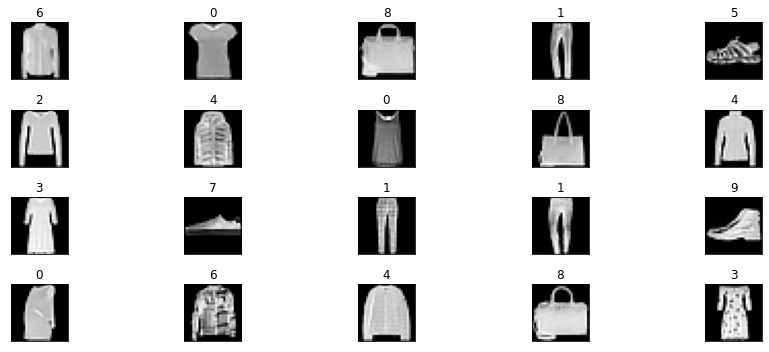

In [20]:
# plot the data
fig = plt.figure(figsize=(15,5))
for i in np.arange(20):
    ax = fig.add_subplot(4, int(20/4), i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(labels[i].item())
    fig.tight_layout()